## Analysis of the results of Lab 4: Integrals (Part 2)

#### First let's analyse the average calculation time for 3 functions depemding om the number of threads used

In [29]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [32]:
# Set the intial requirements
command = "python3"
script_path = "./utility.py"
executable_path = "../build/integrate_parallel"
num_times = "100"

threads = [str(i) for i in range(1, 17)] + ["100", "1000"]

# Initialize a dictionary to store the results
results = {"Threads": [], "Function": [], "Average Time": []}

Caught wrong number of threads exception: Number of threads is greater or equal to number of points
Caught wrong number of threads exception: Number of threads is greater or equal to number of points
Caught wrong number of threads exception: Number of threads is greater or equal to number of points
Caught wrong number of threads exception: Number of threads is greater or equal to number of points
Caught wrong number of threads exception: Number of threads is greater or equal to number of points
Caught wrong number of threads exception: Number of threads is greater or equal to number of points
Caught wrong number of threads exception: Number of threads is greater or equal to number of points
Caught wrong number of threads exception: Number of threads is greater or equal to number of points
Caught wrong number of threads exception: Number of threads is greater or equal to number of points
Caught wrong number of threads exception: Number of threads is greater or equal to number of points


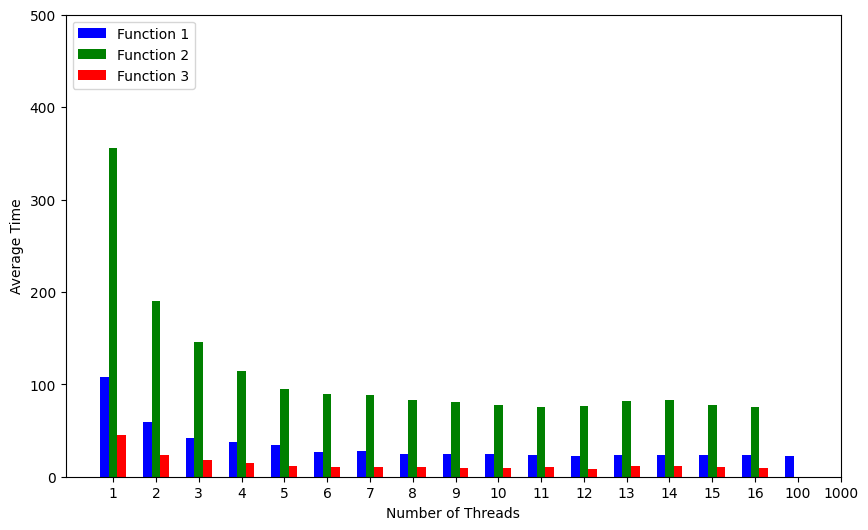

In [33]:
# Now plotting the results recieved from output.csv
for thread in threads:
    with open(os.devnull, 'w') as devnull:
        subprocess.run([command, script_path, executable_path, num_times, thread], stdout=devnull)

    data = pd.read_csv('../data/output.csv')

    for i in range(1, 4):
        func_data = data[data['Function'] == i]
        results["Threads"].append(int(thread))
        results["Function"].append(i)
        results["Average Time"].append(func_data['Average Time'].mean())

df = pd.DataFrame(results)
df.to_csv('results.csv', index=False)

plt.figure(figsize=(10, 6))
bar_width = 0.2
colors = ['b', 'g', 'r']
for i, func in enumerate(range(1, 4)):
    for j, thread in enumerate(threads):
        func_data = df[(df['Function'] == func) & (df['Threads'] == int(thread))]
        plt.bar(j + i * bar_width, func_data['Average Time'], width=bar_width, color=colors[i], label=f'Function {func}' if j == 0 else "")

plt.xlabel('Number of Threads')
plt.ylabel('Average Time')
plt.xticks(np.arange(len(threads)) + bar_width, threads)
plt.ylim(0, 500)
plt.legend()
plt.show()